# 6

In [1]:
import numpy as np
from scipy.sparse import spdiags
from scipy.sparse.linalg import eigs
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams.update({'font.size': 14})

imgloc = r'D:\Uni\Master\Mulitscale_methods\DFT\tex\images'

def img_loc(loc: str):
	return rf'{imgloc}\{loc}'


def ElectronDensity(wavefunc):
	"""
	Function:	function that calculates the electron density from the orbital wave function.
	Input:		wavefunc: a 1-dimensional vector that stores the wavefunction.
	Output:		dens: a 1-dimensional vector that stores the electron density.
	Errors:		none, you're on your own.
	! NOTE: A real space projection is done since the wavefunctions are purely real and this gets rid of warnings !
	"""
	dens = np.real(np.square(wavefunc))

	return dens

def HartreePotential(y_n, step, dens):
	"""
	Function:	calculates the Hatree potential from a given electron density on a numerical grid
	Input:		y_n: the numerical grid used in the calculation.
				step: the step size of the grid.
				dens: the electron density of the system.
	Output:		hartree: the Hartree potential for the given electron density of the system.
	Errors:		none, you're on your own.
	"""
	N_grid = len(y_n)
	charge = np.cumsum(dens) * step
	hartree = np.zeros(N_grid)

	pot_int = 0

	for i in range(N_grid - 2, -1, -1):
		pot_int = pot_int + 2 * charge[i + 1] / (y_n[i + 1] ** 2) * step
		hartree[i] = hartree[i] + pot_int

	hartree = hartree + 2 / y_n[-1]

	return hartree

In [5]:
# grid parameters (see problem 1)
eta = 1E-10
N_grid = 100000
y_end = 20.0
y = np.linspace(0, y_end, N_grid) + eta
h = y[1] - y[0]

# construct matrix elements, kinetic energy and nuclear potential (see problem 1)
subd = -1 * np.ones(N_grid) / h ** 2
superd = -1 * np.ones(N_grid) / h ** 2
diagonal = 2 * (1 / h ** 2 - 2 / y)
# initialize wave function, density and Hartree potential
chi = np.exp(- y / 2) * y / np.sqrt(2)
# dens = ElectronDensity(chi)
# hartree = HartreePotential(y, h, dens)

repeats = 50
energies = np.zeros(repeats)
functions = np.zeros((repeats, N_grid))
for i in range(repeats):
    dens = ElectronDensity(chi)
    hartree = HartreePotential(y, h, dens)
    matrix = spdiags([subd, diagonal+hartree, superd], [-1, 0, 1], N_grid, N_grid)
    energy, vect = eigs(matrix, 1, sigma=-10)
    energies[i] = np.real(energy[0])

    func = np.real(vect[:, 0])/np.sqrt(np.trapz(vect[:, 0]**2, x=y))
    functions[i] = func
    chi = func
    # if np.any(abs(energies[i] - energies[:i]) < 1e-15):
    #     break

energies = energies[:i]
functions = functions[:i]

C:\Users\drost\AppData\Local\Temp\ipykernel_3912\1730869348.py:28: ComplexWarning: Casting complex values to real discards the imaginary part
  functions[i] = func


[3.37568614 3.37568434 3.37568208 ... 0.100002   0.100001   0.1       ]


In [16]:
value = (8 + 2*energies[-1])/2
print(2*energies[-1] - value)
print(energies[-1] - 4)

-5.835928868449049
-5.835928868449049


In [3]:
subd = -1 * np.ones(N_grid) / h ** 2
superd = -1 * np.ones(N_grid) / h ** 2
diagonal = 2 * np.ones(N_grid) / h ** 2
matrix = spdiags([subd, diagonal+hartree, superd], [-1, 0, 1], N_grid, N_grid)
int1 = np.trapz(0.5*functions[-1]*matrix.dot(functions[-1]), y)
int2 = np.trapz(2*functions[-1]*functions[-1]/y, y)
print(f'{energies[-1]}, {int1}, {int2}')
print(f'{2*(energies[-1]+int1-int2)}')

-1.8359288684490576, 2.456521211953636, 3.374485646148392
-5.507786605287627


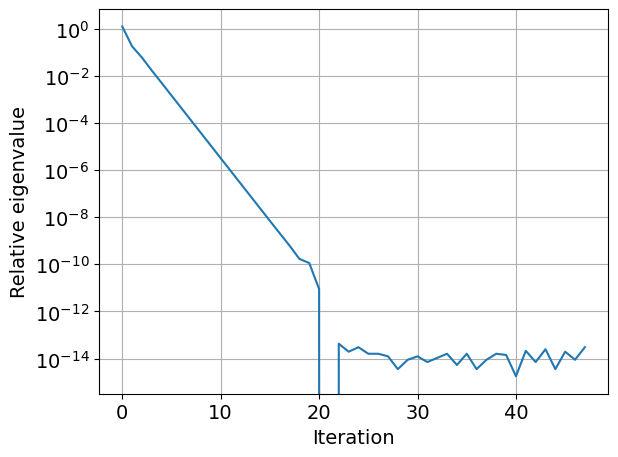

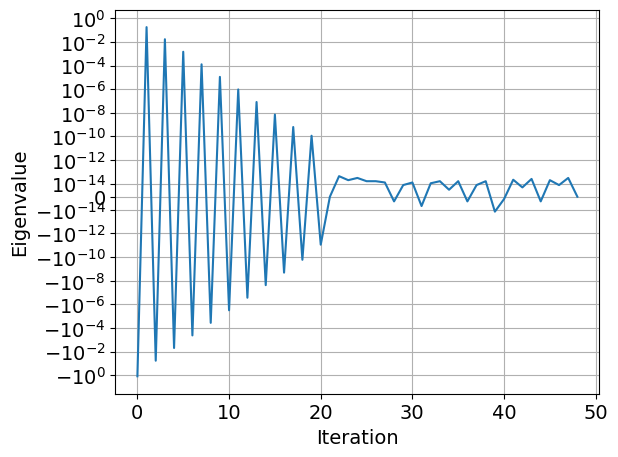

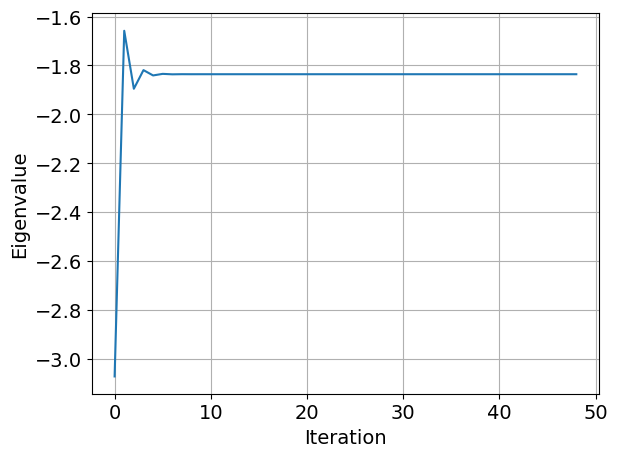

-1.8359288684490473
1.1162191174623799e-14


D:\Anaconda\envs\DataAnalysis\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


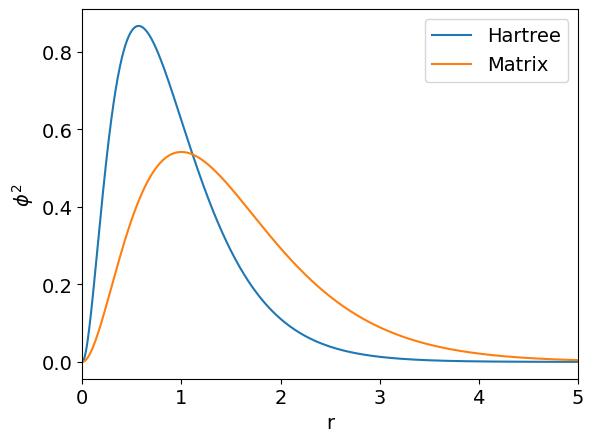

In [4]:
plt.figure()
plt.semilogy(np.abs(energies[:-1]-energies[-1]))
plt.xlabel('Iteration')
plt.ylabel('Relative eigenvalue')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('6b_error.png'))
plt.show()

plt.figure()
plt.plot(energies-energies[-1])
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue')
plt.yscale(mpl.scale.SymmetricalLogScale(plt.gca(), linthresh=1e-14))
plt.grid()
plt.gca().xaxis.grid(True, which='minor')
plt.tight_layout()
plt.savefig(img_loc('6b_value.png'))
plt.show()

plt.figure()
plt.plot(energies)
plt.xlabel('Iteration')
plt.ylabel('Eigenvalue')
plt.grid()
plt.tight_layout()
plt.savefig(img_loc('6b_value.png'))
plt.show()

print(np.mean(energies[23:]))
print(np.std(energies[23:]))


diag = np.full(N_grid, 2 / (h ** 2)) - 2 / y
diag_off = np.full(N_grid, -1 / (h ** 2))
matrix = spdiags([diag_off, diag, diag_off], [-1, 0, 1], N_grid, N_grid)

value, vector = eigs(matrix, 3, sigma=-10)

# rho = np.abs(functions[-1]**2)
# y_vals = np.abs(y-y[:, None])
# integral = rho*rho[:, None]/y_vals
# integral = np.sum(integral[y_vals!=0])*h*h
# print(integral)
# print(np.trapz(functions[-1]**2, x=y))

plt.figure()
plt.plot(y, functions[-1]**2/np.trapz(functions[-1]**2, y), label='Hartree')
plt.plot(y, vector[:, 0]**2/np.trapz(vector[:, 0]**2, y), label='Matrix')
plt.xlim(0, 5)
plt.legend()
plt.ylabel('$\phi^2$')
plt.xlabel('r')
plt.savefig(img_loc('6b_wavefunc.png'))
plt.show()

array([-3.99989983+0.j, -0.99999373+0.j, -0.4444432 +0.j])